<a href="https://colab.research.google.com/github/elanghairilanam/Portfolio-Data-Science/blob/main/Movie_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

os.chdir('/content/gdrive/MyDrive/Dataset/Movie Analisis')

In [ ]:
os.listdir()

['movies_metadata.csv', 'ratings_small.csv']

In [ ]:
movies_data = pd.read_csv("movies_metadata.csv")

<ipython-input-4-979d22ee55da>:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_data = pd.read_csv("movies_metadata.csv")


In [ ]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [ ]:
# Mengonversi kolom "release_date" ke tipe data datetime
movies_data["release_date"] = pd.to_datetime(movies_data["release_date"], errors='coerce')

In [ ]:
movies_data["release_date"]

0       1995-10-30
1       1995-12-15
2       1995-12-22
3       1995-12-22
4       1995-02-10
           ...    
45461          NaT
45462   2011-11-17
45463   2003-08-01
45464   1917-10-21
45465   2017-06-09
Name: release_date, Length: 45466, dtype: datetime64[ns]

In [ ]:
english_release = movies_data[(movies_data["status"] == "Released") & (movies_data["original_language"] == "en")]

english_release

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45459,False,NaN,0,"[{'id': 878, 'name': 'Science Fiction'}]",NaN,222848,tt0112613,en,Caged Heat 3000,It's the year 3000 AD. The world's most danger...,...,1995-01-01,0.0,85.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Caged Heat 3000,False,3.5,1.0
45460,False,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 28, 'name...",NaN,30840,tt0102797,en,Robin Hood,"Yet another version of the classic epic, with ...",...,1991-05-13,0.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Robin Hood,False,5.7,26.0
45463,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...",NaN,67758,tt0303758,en,Betrayal,"When one of her hits goes wrong, a professiona...",...,2003-08-01,0.0,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A deadly game of wits.,Betrayal,False,3.8,6.0
45464,False,NaN,0,[],NaN,227506,tt0008536,en,Satana likuyushchiy,"In a small town live two brothers, one a minis...",...,1917-10-21,0.0,87.0,[],Released,NaN,Satan Triumphant,False,0.0,0.0


In [ ]:
english_release = english_release.drop_duplicates()

In [ ]:
#Handling Missing Value

english_release["belongs_to_collection"] = english_release['belongs_to_collection'].fillna("No Data")
english_release['homepage'] = english_release['homepage'].fillna("No Data")
english_release['poster_path'] = english_release['poster_path'].fillna("No Data")
english_release['tagline'] = english_release['tagline'].fillna("No Tagline")

<ipython-input-10-59957149dad8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_release["belongs_to_collection"] = english_release['belongs_to_collection'].fillna("No Data")
<ipython-input-10-59957149dad8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_release['homepage'] = english_release['homepage'].fillna("No Data")
<ipython-input-10-59957149dad8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [ ]:
english_release.dropna(inplace = True)

<ipython-input-11-69077d33911e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_release.dropna(inplace = True)


In [ ]:
english_release.isna().sum()

adult                    0
belongs_to_collection    0
budget                   0
genres                   0
homepage                 0
id                       0
imdb_id                  0
original_language        0
original_title           0
overview                 0
popularity               0
poster_path              0
production_companies     0
production_countries     0
release_date             0
revenue                  0
runtime                  0
spoken_languages         0
status                   0
tagline                  0
title                    0
video                    0
vote_average             0
vote_count               0
dtype: int64

In [ ]:
rating = pd.read_csv("ratings_small.csv")

In [ ]:
rating.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
rating["timestamp"] = pd.to_datetime(rating["timestamp"], unit = "s")

In [ ]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   userId     100004 non-null  int64         
 1   movieId    100004 non-null  int64         
 2   rating     100004 non-null  float64       
 3   timestamp  100004 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB


In [ ]:
rating.duplicated().sum()

0

In [ ]:
rating.groupby("movieId").agg({"userId" : pd.Series.nunique,
                               "rating": ["mean", "median"]})

userId    rating       
        nunique      mean median
movieId                         
1           247  3.872470    4.0
2           107  3.401869    3.0
3            59  3.161017    3.0
4            13  2.384615    3.0
5            56  3.267857    3.0
...         ...       ...    ...
161944        1  5.000000    5.0
162376        1  4.500000    4.5
162542        1  5.000000    5.0
162672        1  3.000000    3.0
163949        1  5.000000    5.0

[9066 rows x 3 columns]

In [ ]:
movies_rating = rating.groupby("movieId")["rating"].agg(["mean","median","count"])

In [ ]:
movies_rating.head()

,mean,median,count
movieId,,,
1,3.872470,4.0,247
2,3.401869,3.0,107
3,3.161017,3.0,59
4,2.384615,3.0,13
5,3.267857,3.0,56


In [ ]:
english_release["id"] = english_release["id"].astype("int")

english_release = english_release.merge(movies_rating,
                      left_on = "id",
                      right_on = "movieId",
                      how = "inner")

<ipython-input-21-1b8d910aa8dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  english_release["id"] = english_release["id"].astype("int")


In [ ]:
english_release.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,spoken_languages,status,tagline,title,video,vote_average,vote_count,mean,median,count
0,False,No Data,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",No Data,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,3.593750,3.75,16
1,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,1.500000,1.50,2
2,False,No Data,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",No Data,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Course Has Been Set. There Is No Turning B...,Cutthroat Island,False,5.7,137.0,3.616279,4.00,43
3,False,No Data,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",No Data,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,No one stays at the top forever.,Casino,False,7.8,1343.0,3.555556,3.50,36
4,False,No Data,16500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",No Data,4584,tt0114388,en,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Lose your heart and come to your senses.,Sense and Sensibility,False,7.2,364.0,5.000000,5.00,1


In [ ]:
english_release["budget"] = english_release["budget"].astype("int")

english_release["profit"] = english_release["revenue"] - english_release["budget"]

In [ ]:
english_release[["original_title", "profit"]].sort_values("profit", ascending = False).head(10)

,original_title,profit
310,Titanic,1.645034e+09
976,The Lord of the Rings: The Return of the King,1.024889e+09
1309,Pirates of the Caribbean: Dead Man's Chest,8.656598e+08
82,Jurassic Park,8.571000e+08
759,Harry Potter and the Philosopher's Stone,8.514756e+08
851,The Lord of the Rings: The Two Towers,8.472874e+08
881,Finding Nemo,8.463355e+08
1500,The Dark Knight,8.195584e+08
1049,Shrek 2,7.698388e+08
40,Star Wars,7.643980e+08


In [ ]:
english_release["long_duration_movie"] = (english_release["runtime"] >= 60 * 3).astype("int")

english_release[english_release["long_duration_movie"] == 1]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,tagline,title,video,vote_average,vote_count,mean,median,count,profit,long_duration_movie
92,False,No Data,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",http://www.schindlerslist.com/,424,tt0108052,en,Schindler's List,The true story of how businessman Oskar Schind...,...,"Whoever saves one life, saves the world entire.",Schindler's List,False,8.3,4436.0,3.000000,3.50,3,2.993656e+08,1
94,False,No Data,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",No Data,695,tt0108122,en,Short Cuts,"Multi-storied, fish-eyed look at American cult...",...,Short Cuts raises the roof on America.,Short Cuts,False,6.9,136.0,4.000000,4.00,2,6.110979e+06,1
102,False,No Data,22000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",No Data,581,tt0099348,en,Dances with Wolves,"Wounded Civil War soldier, John Dunbar tries t...",...,Inside everyone is a frontier waiting to be di...,Dances with Wolves,False,7.6,1084.0,4.235294,4.00,17,4.022088e+08,1
196,False,No Data,15000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 18, '...",No Data,947,tt0056172,en,Lawrence of Arabia,An epic about British officer T.E. Lawrence's ...,...,No Tagline,Lawrence of Arabia,False,7.8,870.0,3.681818,4.00,11,5.499538e+07,1
206,False,"{'id': 230, 'name': 'The Godfather Collection'...",13000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",No Data,240,tt0071562,en,The Godfather: Part II,In the continuing saga of the Corleone crime f...,...,"I don't feel I have to wipe everybody out, Tom...",The Godfather: Part II,False,8.3,3418.0,3.400000,3.00,5,3.454284e+07,1
238,False,No Data,15000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",No Data,665,tt0052618,en,Ben-Hur,Ben-Hur is a 1959 epic film directed by Willia...,...,The entertainment experience of a lifetime.,Ben-Hur,False,7.5,660.0,3.400000,3.00,5,1.319000e+08,1
240,False,No Data,22000000,"[{'id': 18, 'name': 'Drama'}, {'id': 36, 'name...",No Data,783,tt0083987,en,Gandhi,"In the early years of the 20th century, Mohand...",...,His triumph changed the world forever.,Gandhi,False,7.4,730.0,3.357143,3.50,49,5.573789e+07,1
310,False,No Data,200000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.titanicmovie.com,597,tt0120338,en,Titanic,"84 years later, a 101-year-old woman named Ros...",...,Nothing on Earth could come between them.,Titanic,False,7.5,7770.0,3.360544,3.00,147,1.645034e+09,1
360,False,No Data,11000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",No Data,907,tt0059113,en,Doctor Zhivago,Doctor Zhivago is the filmed adapation of the ...,...,Turbulent were the times and fiery was the lov...,Doctor Zhivago,False,7.4,252.0,4.090909,4.00,11,1.008584e+08,1
479,False,No Data,11000000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",No Data,3175,tt0072684,en,Barry Lyndon,"In the Eighteenth Century, in a small village ...",...,At long last Redmond Barry became a gentleman ...,Barry Lyndon,False,7.7,521.0,3.507692,3.50,65,9.000000e+06,1


In [ ]:
english_release["duration_hours"] = english_release["runtime"] / 60

In [ ]:
english_release[["original_title","duration_hours"]].sort_values("duration_hours", ascending = False).head(10)

,original_title,duration_hours
1680,Judex,5.000000
1026,Frank Herbert's Dune,4.866667
1552,Flash Gordon,4.083333
2048,Jesus,4.000000
1565,Ludwig,3.916667
196,Lawrence of Arabia,3.600000
1660,Feast of All Saints,3.550000
238,Ben-Hur,3.533333
1574,Chelsea Girls,3.500000
837,Exodus,3.466667


In [ ]:
english_release["favorite_movie"] = (english_release["median"] >= 3).astype("int")

english_release[english_release["favorite_movie"] == 1]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,video,vote_average,vote_count,mean,median,count,profit,long_duration_movie,duration_hours,favorite_movie
0,False,No Data,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",No Data,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,False,7.7,1886.0,3.593750,3.75,16,127436818.0,0,2.833333,1
2,False,No Data,98000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",No Data,1408,tt0112760,en,Cutthroat Island,"Morgan Adams and her slave, William Shaw, are ...",...,False,5.7,137.0,3.616279,4.00,43,-87982678.0,0,1.983333,1
3,False,No Data,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",No Data,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,...,False,7.8,1343.0,3.555556,3.50,36,64112375.0,0,2.966667,1
4,False,No Data,16500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",No Data,4584,tt0114388,en,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",...,False,7.2,364.0,5.000000,5.00,1,118500000.0,0,2.266667,1
5,False,No Data,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",No Data,5,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,...,False,6.5,539.0,3.267857,3.00,56,300000.0,0,1.633333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,False,No Data,0,"[{'id': 16, 'name': 'Animation'}]",No Data,84601,tt0044198,en,The Wearing of the Grin,Porky Pig spends the night at an Irish castle ...,...,False,6.0,2.0,3.500000,3.50,5,0.0,0,0.116667,1
2047,False,No Data,0,"[{'id': 18, 'name': 'Drama'}]",No Data,3178,tt0211941,en,Beat,The story of writer William Seward Burroughs a...,...,False,4.9,9.0,3.636364,4.00,22,0.0,0,1.550000,1
2048,False,"{'id': 2704, 'name': 'The Bible Collection', '...",20000000,"[{'id': 36, 'name': 'History'}, {'id': 18, 'na...",No Data,2331,tt0199232,en,Jesus,The film is notable for presenting a more huma...,...,False,5.4,8.0,3.777778,4.00,9,-20000000.0,1,4.000000,1
2049,False,No Data,0,"[{'id': 18, 'name': 'Drama'}]",No Data,80831,tt1576459,en,Sang Pemimpi,This movie is an adaptation from a popular nov...,...,False,6.5,2.0,3.250000,3.25,4,0.0,0,2.016667,1


In [ ]:
english_release["year_release"] = english_release["release_date"].dt.year

english_release["year_release"]

0       1995
1       1995
2       1995
3       1995
4       1995
        ... 
2046    2006
2047    2000
2048    1999
2049    2009
2050    1967
Name: year_release, Length: 2051, dtype: int32

In [ ]:
#EDA

# Mengubah nilai non-numerik menjadi NaN
movies_data['budget'] = pd.to_numeric(movies_data['budget'], errors='coerce')

# Menghapus baris dengan nilai NaN di kolom 'budget'
movies_data.dropna(subset=['budget'], inplace=True)

# Mengubah tipe data kolom 'budget' menjadi integer
movies_data['budget'] = movies_data['budget'].astype(int)

movies_data["profit"] = movies_data["revenue"] - movies_data["budget"]

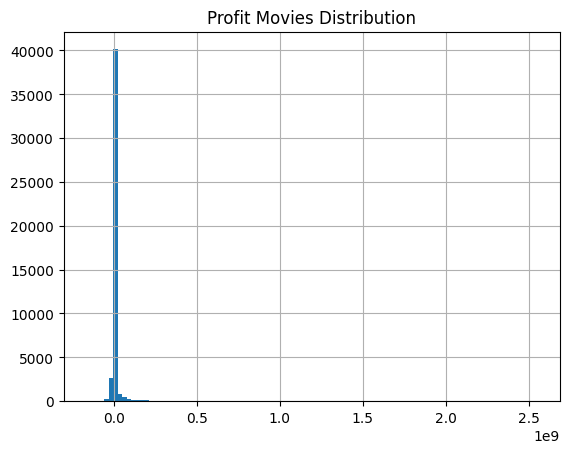

In [ ]:
movies_data["profit"].hist(bins = 100)
plt.title("Profit Movies Distribution")
plt.show()

In [ ]:
movies_data["profit"].describe()

count    4.546000e+04
mean     6.984491e+06
std      5.214125e+07
min     -1.657101e+08
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.550965e+09
Name: profit, dtype: float64

<Axes: >

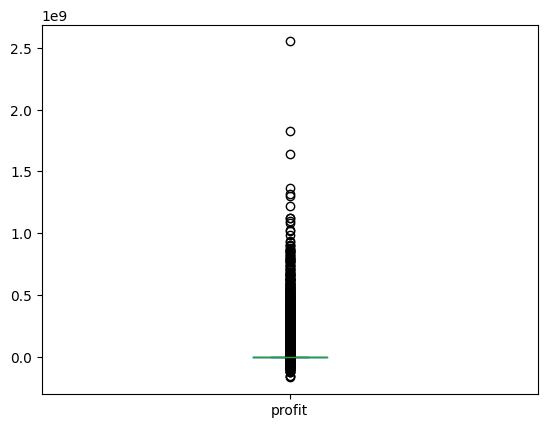

In [ ]:
movies_data["profit"].plot(kind = "box")

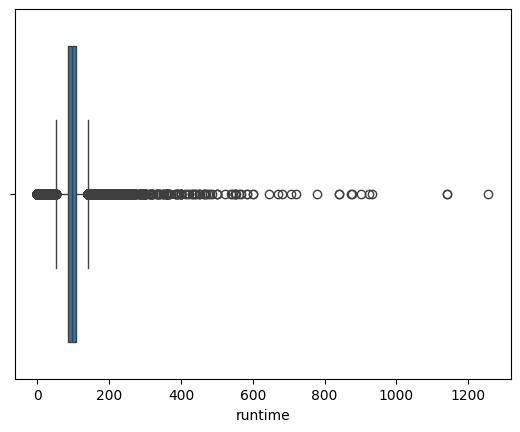

In [ ]:
sns.boxplot(data = movies_data, x = "runtime")
plt.show()

In [ ]:
movies_data["profit"].quantile(0.9)

1578210.8999999824

In [ ]:
#Hanya 10% film yang mampu memberikan profit. Sementara sisanya, balik modal

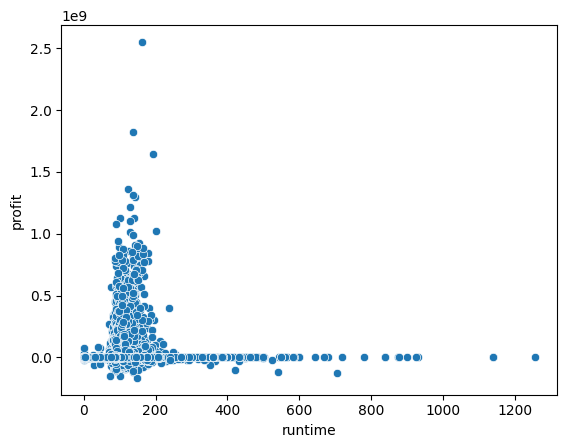

In [ ]:
sns.scatterplot( data = movies_data,
                x = "runtime",
                y = "profit")
plt.show()

In [ ]:
profitable_movies = movies_data[movies_data["profit"] > 0]

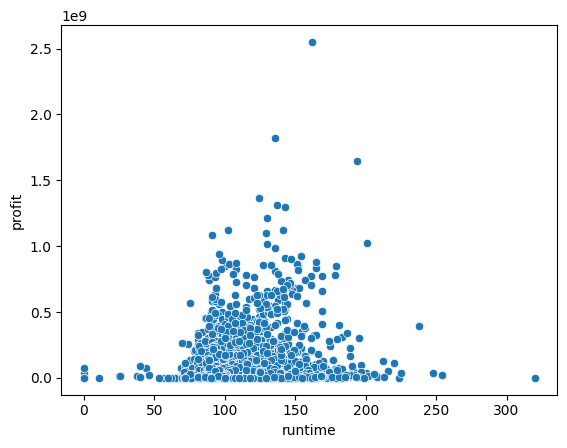

In [ ]:
sns.scatterplot( data = profitable_movies,
                 x = "runtime",
                 y = "profit")
plt.show()

In [ ]:
rating = pd.read_csv("ratings_small.csv")

In [ ]:
rating_movies = rating.groupby("movieId", as_index = False)["rating"].median()

rating_movies

,movieId,rating
0,1,4.0
1,2,3.0
2,3,3.0
3,4,3.0
4,5,3.0
...,...,...
9061,161944,5.0
9062,162376,4.5
9063,162542,5.0
9064,162672,3.0


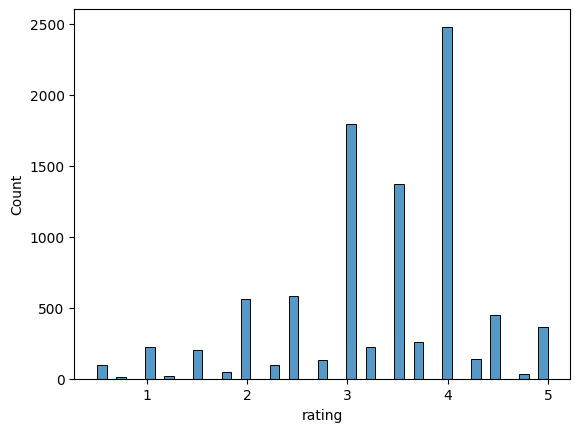

In [ ]:
sns.histplot(data = rating_movies,
             x = "rating")
plt.show()

In [ ]:
rating_movies["good_movies"] = rating_movies["rating"] >= 3

In [ ]:
rating_movies["good_movies"].value_counts(normalize = True)

good_movies
True     0.783918
False    0.216082
Name: proportion, dtype: float64

In [ ]:
profitable_movies["id"] = profitable_movies["id"].astype("int")


new_df = profitable_movies.merge(rating_movies,
                        left_on = "id",
                        right_on = "movieId",
                        how = "inner")
new_df.head(10)

<ipython-input-45-92d63c255329>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_movies["id"] = profitable_movies["id"].astype("int")


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,status,tagline,title,video,vote_average,vote_count,profit,movieId,rating,good_movies
0,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",...,Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0,127436818.0,949,3.75,True
1,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 28, '...",http://www.mgm.com/view/movie/757/Goldeneye/,710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,...,Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,294194034.0,710,1.50,False
2,False,NaN,52000000,"[{'id': 18, 'name': 'Drama'}, {'id': 80, 'name...",NaN,524,tt0112641,en,Casino,The life of the gambling paradise – Las Vegas ...,...,Released,No one stays at the top forever.,Casino,False,7.8,1343.0,64112375.0,524,3.50,True
3,False,NaN,16500000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",NaN,4584,tt0114388,en,Sense and Sensibility,"Rich Mr. Dashwood dies, leaving his second wif...",...,Released,Lose your heart and come to your senses.,Sense and Sensibility,False,7.2,364.0,118500000.0,4584,5.00,True
4,False,NaN,4000000,"[{'id': 80, 'name': 'Crime'}, {'id': 35, 'name...",NaN,5,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,...,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,False,6.5,539.0,300000.0,5,3.00,True
5,False,"{'id': 91698, 'name': 'Chili Palmer Collection...",30250000,"[{'id': 35, 'name': 'Comedy'}, {'id': 53, 'nam...",NaN,8012,tt0113161,en,Get Shorty,Chili Palmer is a Miami mobster who gets sent ...,...,Released,"The mob is tough, but it’s nothing like show b...",Get Shorty,False,6.4,305.0,84851622.0,8012,4.25,True
6,False,NaN,3600000,"[{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...",http://www.mgm.com/title_title.do?title_star=L...,451,tt0113627,en,Leaving Las Vegas,"Ben Sanderson, an alcoholic Hollywood screenwr...",...,Released,I Love You... The Way You Are.,Leaving Las Vegas,False,7.1,365.0,46200000.0,451,4.00,True
7,False,NaN,29500000,"[{'id': 878, 'name': 'Science Fiction'}, {'id'...",NaN,63,tt0114746,en,Twelve Monkeys,"In the year 2035, convict James Cole reluctant...",...,Released,The future is history.,Twelve Monkeys,False,7.4,2470.0,139340000.0,63,3.25,True
8,False,NaN,11000000,"[{'id': 18, 'name': 'Drama'}]",NaN,687,tt0112818,en,Dead Man Walking,A justice drama based on a true story about a ...,...,Released,NaN,Dead Man Walking,False,7.3,350.0,28363635.0,687,3.00,True
9,False,NaN,20000000,"[{'id': 14, 'name': 'Fantasy'}, {'id': 18, 'na...",NaN,577,tt0114681,en,To Die For,Susan wants to work in television and will the...,...,Released,All she wanted was a little attention.,To Die For,False,6.7,177.0,1284514.0,577,2.00,False


<Axes: xlabel='rating', ylabel='profit'>

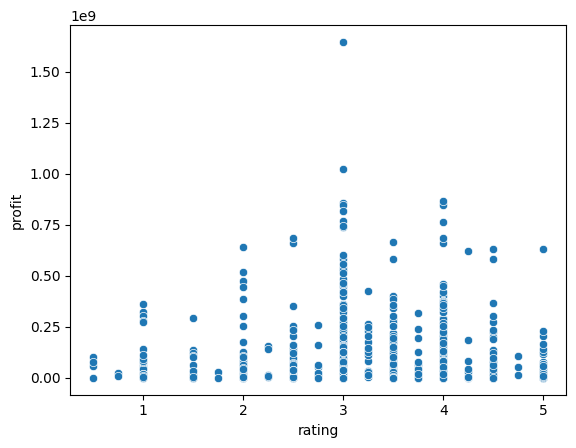

In [ ]:
sns.scatterplot( data = new_df,
             x = "rating",
             y = "profit")

In [ ]:
new_df[["rating"]]

,rating
0,3.75
1,1.50
2,3.50
3,5.00
4,3.00
...,...
1027,3.00
1028,4.00
1029,4.00
1030,4.00


<Axes: xlabel='original_language'>

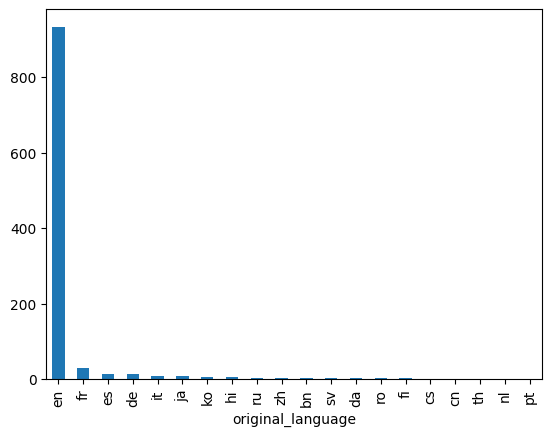

In [ ]:
new_df['original_language'].value_counts().plot(kind = "bar" )

In [ ]:
new_df.select_dtypes(include = "number")

,budget,id,revenue,runtime,vote_average,vote_count,profit,movieId,rating
0,60000000,949,187436818.0,170.0,7.7,1886.0,127436818.0,949,3.75
1,58000000,710,352194034.0,130.0,6.6,1194.0,294194034.0,710,1.50
2,52000000,524,116112375.0,178.0,7.8,1343.0,64112375.0,524,3.50
3,16500000,4584,135000000.0,136.0,7.2,364.0,118500000.0,4584,5.00
4,4000000,5,4300000.0,98.0,6.5,539.0,300000.0,5,3.00
...,...,...,...,...,...,...,...,...,...
1027,0,106417,15.0,133.0,4.8,4.0,15.0,106417,3.00
1028,0,79163,2203.0,81.0,0.0,0.0,2203.0,79163,4.00
1029,0,2104,60700.0,98.0,5.0,2.0,60700.0,2104,4.00
1030,5300000,8453,22175908.0,168.0,6.7,53.0,16875908.0,8453,4.00


In [ ]:
#Memilih kolom fitur yang ditentukan dari DataFrame yang diberikan.
#Mengonversi kolom target ke dalam bentuk label biner, dengan batas klasifikasi pada nilai 3.

def select_columns(df : pd.DataFrame, features : list, target : list = "rating"):
  df = df.dropna().reset_index(drop = True)
  x = df[features]
  y = (df[target] >= 3).astype("int")

  return x,y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
features = ["budget", "popularity", "vote_average"]
X, y = select_columns(new_df,features = features)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 41)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
#scaling data

minmax = MinMaxScaler()

In [ ]:
minmax.fit(X_train)

MinMaxScaler()

In [ ]:
def scaling(df, scaler):
  scaled_array = scaler.transform(df)
  scaled_df = pd.DataFrame(scaled_array, columns = scaler.get_feature_names_out())

  return scaled_df

In [ ]:
X_train_scaled = scaling(X_train, minmax)
X_test_scaled = scaling(X_test, minmax)

In [ ]:
X_test_scaled

,budget,popularity,vote_average
0,0.133333,0.073157,0.681818
1,0.021667,0.042120,0.545455
2,0.100000,0.062403,0.613636
3,0.616667,0.069229,0.363636
4,0.200000,0.114766,0.727273
5,0.107833,0.086136,0.863636
6,0.100000,0.149290,0.727273
7,0.220000,0.074528,0.545455
8,0.023333,0.056031,0.431818
9,0.166667,0.068552,0.522727


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
dt = DecisionTreeClassifier()

In [ ]:
knn.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [ ]:
y_train_pred_knn = knn.predict(X_train_scaled)
y_train_pred_dt = dt.predict(X_train_scaled)

In [ ]:
y_test_pred_knn = knn.predict(X_test_scaled)
y_test_pred_dt = dt.predict(X_test_scaled)

In [ ]:
pd.crosstab(y_test, y_test_pred_knn)

col_0,0,1
rating,,
0,0,5
1,2,31


In [ ]:
pd.crosstab(y_test, y_test_pred_dt)

col_0,0,1
rating,,
0,0,5
1,2,31
